In [13]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
weather_api_key = "86e76fb2cc5aa16de24e105e15c4893a"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [14]:

# List for holding lat_lngs / cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [15]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [16]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : louis trichardt
Processing Record 2 of Set 1 : kapaa
Processing Record 3 of Set 1 : jamestown
Processing Record 4 of Set 1 : atuona
Processing Record 5 of Set 1 : mtama
Processing Record 6 of Set 1 : barabai
Processing Record 7 of Set 1 : kavieng
Processing Record 8 of Set 1 : katobu
Processing Record 9 of Set 1 : yellowknife
Processing Record 10 of Set 1 : chokurdakh
Processing Record 11 of Set 1 : novyy urengoy
City not found. Skipping...
Processing Record 12 of Set 1 : brigg
Processing Record 13 of Set 1 : salalah
Processing Record 14 of Set 1 : alugan
Processing Record 15 of Set 1 : guerrero negro
Processing Record 16 of Set 1 : bethel
Processing Record 17 of Set 1 : kiunga
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : krasnorechenskiy
Processing Record 20 of Set 1 : shimoda
Processing Record 21 of Set 1 : camacari
City not found. Skipping...
Processing Record 22 of Se

Processing Record 41 of Set 4 : sandwick
Processing Record 42 of Set 4 : faanui
Processing Record 43 of Set 4 : abeche
Processing Record 44 of Set 4 : sicamous
Processing Record 45 of Set 4 : anadyr
Processing Record 46 of Set 4 : kruisfontein
Processing Record 47 of Set 4 : zhigansk
Processing Record 48 of Set 4 : hoi an
Processing Record 49 of Set 4 : porto novo
Processing Record 50 of Set 4 : aswan
City not found. Skipping...
Processing Record 0 of Set 5 : itambe
Processing Record 1 of Set 5 : nyaunglebin
City not found. Skipping...
Processing Record 2 of Set 5 : carnarvon
Processing Record 3 of Set 5 : margate
Processing Record 4 of Set 5 : ponferrada
Processing Record 5 of Set 5 : natal
Processing Record 6 of Set 5 : nuoro
Processing Record 7 of Set 5 : hokitika
City not found. Skipping...
Processing Record 8 of Set 5 : terney
Processing Record 9 of Set 5 : beloha
Processing Record 10 of Set 5 : constitucion
Processing Record 11 of Set 5 : montagnana
Processing Record 12 of Set 5 

Processing Record 24 of Set 8 : moerai
Processing Record 25 of Set 8 : puerto escondido
Processing Record 26 of Set 8 : great bend
Processing Record 27 of Set 8 : avera
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 8 : savinka
Processing Record 29 of Set 8 : kerrobert
Processing Record 30 of Set 8 : sobolevo
Processing Record 31 of Set 8 : tiznit
Processing Record 32 of Set 8 : linqu
Processing Record 33 of Set 8 : tateyama
Processing Record 34 of Set 8 : baiyin
Processing Record 35 of Set 8 : nishihara
Processing Record 36 of Set 8 : pacific grove
Processing Record 37 of Set 8 : camocim
Processing Record 38 of Set 8 : buala
Processing Record 39 of Set 8 : khonsa
Processing Record 40 of Set 8 : novosheshminsk
Processing Record 41 of Set 8 : vyshestebliyevskaya
Processing Record 42 of Set 8 : broken hill
Processing Record 43 of Set 8 : champerico
Processing Record 44 of Set 8 : palana
Processing Record 45 of Set 8 : elekt

Processing Record 9 of Set 12 : brae
Processing Record 10 of Set 12 : port shepstone
Processing Record 11 of Set 12 : skelleftea
Processing Record 12 of Set 12 : nuristan
Processing Record 13 of Set 12 : moultonborough
-----------------------------
Data Retrieval Complete
-----------------------------


In [18]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [19]:
# Count data
weather_dict.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

In [20]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Louis Trichardt,0,ZA,1591757308,80,-23.04,29.90,50.18,0.89
1,Kapaa,90,US,1591757192,74,22.08,-159.32,82.40,17.22
2,Jamestown,1,US,1591757123,53,42.10,-79.24,77.00,4.70
3,Atuona,95,PF,1591757308,77,-9.80,-139.03,81.14,19.80
4,Mtama,66,TZ,1591757309,92,-10.30,39.37,65.71,1.86
...,...,...,...,...,...,...,...,...,...
569,Brae,90,GB,1591757404,87,60.40,-1.35,44.60,6.93
570,Port Shepstone,0,ZA,1591757404,31,-30.74,30.45,63.75,7.38
571,Skellefteå,0,SE,1591757404,93,64.75,20.95,50.00,3.36
572,Nuristan,3,AF,1591757405,52,35.30,70.83,46.02,3.27


In [38]:
#Save city data into a csv 
weather_dict.to_csv("./output_data/cities.csv", index = False)


FileNotFoundError: [Errno 2] No such file or directory: './output_data/cities.csv'

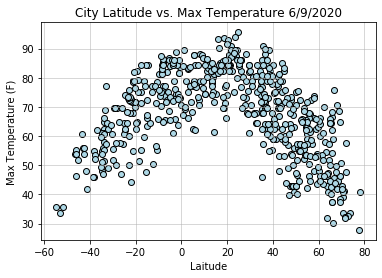

In [26]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "lightblue", edgecolor = "black")

# title
plt.title("City Latitude vs. Max Temperature 6/9/2020")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Max Temperature (F)")

# grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Max Temperature.png")

In [ ]:
As the latitude begins to increase towards 0 the max temperature goes up.This indicates closer to equator the greater the temperature as expected.

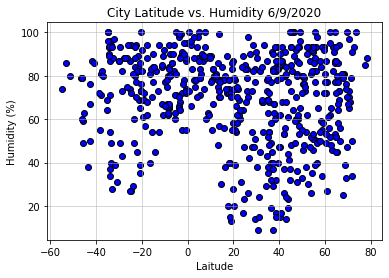

In [27]:
 #Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity 6/9/2020")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Humidity.png")


In [ ]:
There seems to be not many cities near the equator with a low humidity. Most have  50 or above. 

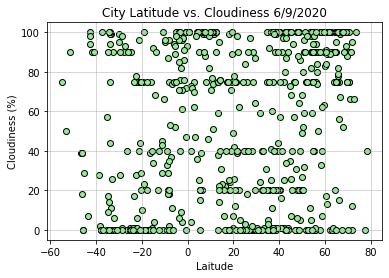

In [28]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "lightgreen", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness 6/9/2020")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Cloudiness.png")

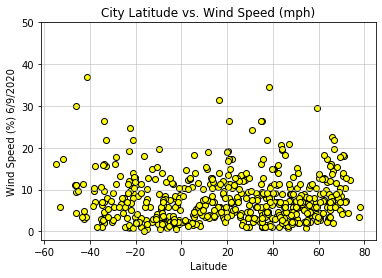

In [29]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "yellow", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%) 6/9/2020")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

In [ ]:
Out of the cities selected there does not seem too many cities that go above 20%. 

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [34]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=12,color="blue")

In [35]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

NameError: name 'st' is not defined

In [36]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

NameError: name 'st' is not defined

In [ ]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")